In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as stats

from sklearn.model_selection import train_test_split

In [2]:
#Define a helper function to generate a time series

T = 2000
y0 = 100
y1 = 100
y = [y0, y1]
d = 0.025
phi = 0.6
theta = -0.4

def generate_time_series(T, y, d, phi, theta, seed = 2021):
    np.random.seed(seed)
    
    prev_noise = np.random.randn()
    
    prices = np.asarray(y)
    
    for i in range(1, T-1):
        
        #First generate noise
        noise = np.random.randn()
        
        #calculate the previous time steps delta
        prev_delta = prices[-1] - prices[-2]
        
        #update
        delta_y = d + phi*(prev_delta - d) + noise + theta*prev_noise
        
        #increment price
        prices = np.append(prices, prices[-1] + delta_y)
        
        prev_noise = noise
    
    return prices

prices = generate_time_series(T, y, d, phi, theta, seed = 1234567890)

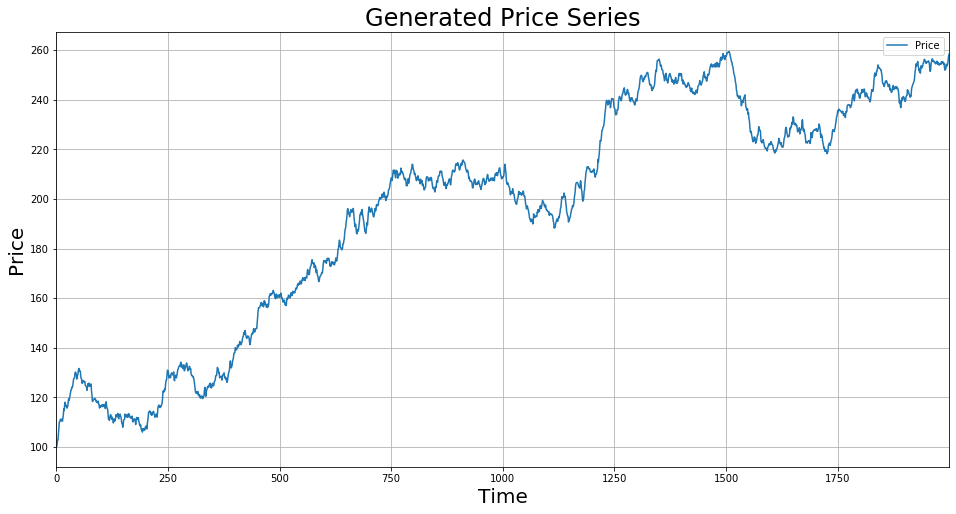

In [4]:
df = pd.DataFrame(prices)
df.columns = ["Price"]

plot = df.plot(figsize = (16, 8))
plt.title("Generated Price Series", fontsize = 24)
plt.ylabel("Price", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.grid()
plt.show()

First we will plot the moving averages for the synthetic data

In [5]:
MA_windows = [50, 100, 200]

for i in MA_windows:
    df["{} Day MA".format(i)] = df["Price"].rolling(i).mean().dropna()

In [6]:
df

,Price,50 Day MA,100 Day MA,200 Day MA
0,100.000000,NaN,NaN,NaN
1,100.000000,NaN,NaN,NaN
2,101.211526,NaN,NaN,NaN
3,102.752393,NaN,NaN,NaN
4,102.858675,NaN,NaN,NaN
...,...,...,...,...
1995,254.209045,254.569632,251.194659,248.001780
1996,254.273744,254.543395,251.326813,248.059198
1997,255.883964,254.559174,251.472548,248.127026
1998,257.434206,254.615781,251.640368,248.208593


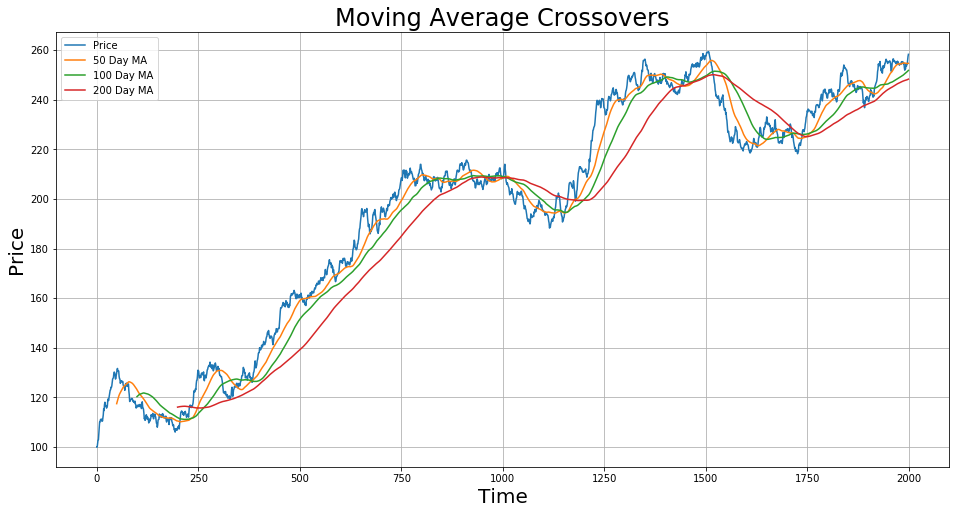

In [7]:
plt.figure(figsize = (16, 8))
plt.plot(df["Price"], label = "Price")
plt.plot(df["50 Day MA"], label = "50 Day MA")
plt.plot(df["100 Day MA"], label = "100 Day MA")
plt.plot(df["200 Day MA"], label = "200 Day MA")
plt.title("Moving Average Crossovers", fontsize = 24)
plt.ylabel("Price", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.grid()
plt.legend(loc = "best")
plt.show()

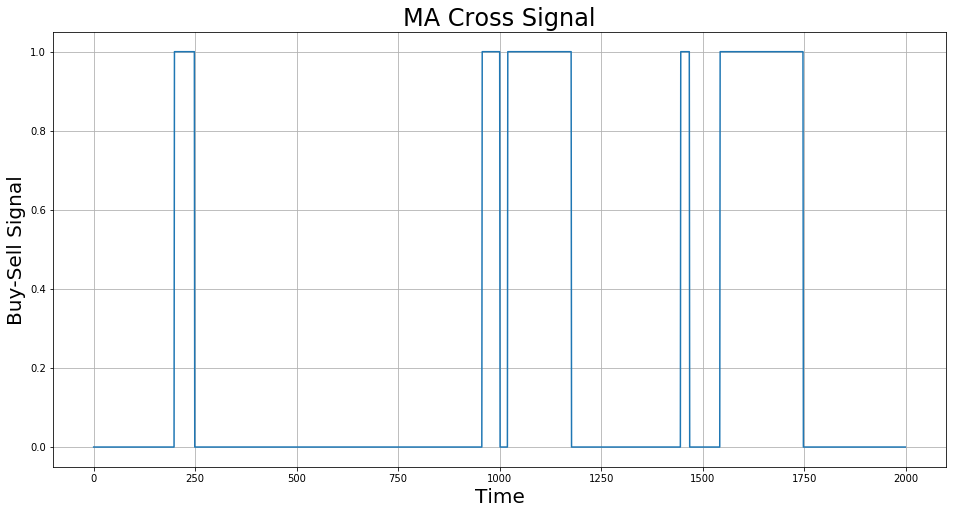

In [8]:
buy_idx = df[df["50 Day MA"] < df["200 Day MA"]].index
sell_idx = df[df["50 Day MA"] > df["200 Day MA"]].index

#Create signal
df['Signal'] = 0
df.loc[buy_idx] = 1

plt.figure(figsize = (16, 8))
plt.plot(df['Signal'])
plt.title("MA Cross Signal", fontsize = 24)
plt.ylabel("Buy-Sell Signal", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.grid()
plt.show()